In [136]:
from pathlib import Path
import pandas as pd

data_path = Path("../data/data_analyst_case_vertigo2025")

files = sorted(data_path.glob("*.csv.gz"))
len(files)

17

In [137]:
df_list = []

for file in files:
    temp_df = pd.read_csv(file, compression="gzip")
    df_list.append(temp_df)

df = pd.concat(df_list, ignore_index=True)


In [138]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7293526 entries, 0 to 7293525
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   user_id                  object 
 1   event_date               object 
 2   platform                 object 
 3   install_date             object 
 4   country                  object 
 5   total_session_count      int64  
 6   total_session_duration   float64
 7   match_start_count        int64  
 8   match_end_count          int64  
 9   victory_count            int64  
 10  defeat_count             int64  
 11  server_connection_error  int64  
 12  iap_revenue              float64
 13  ad_revenue               float64
dtypes: float64(3), int64(6), object(5)
memory usage: 779.0+ MB


,total_session_count,total_session_duration,match_start_count,match_end_count,victory_count,defeat_count,server_connection_error,iap_revenue,ad_revenue
count,7.293526e+06,7.293526e+06,7.293526e+06,7.293526e+06,7.293526e+06,7.293526e+06,7.293526e+06,7.293526e+06,7.293526e+06
mean,1.735753e+00,1.844909e+03,4.728021e+00,3.911876e+00,2.432663e+00,1.479213e+00,3.362955e-02,1.280012e-01,2.006868e-02
std,1.293940e+00,3.205434e+03,8.220787e+00,7.004659e+00,4.969295e+00,3.107429e+00,4.163458e-01,4.272489e+00,9.454978e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2.171480e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,7.074485e+02,2.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,2.045487e+03,5.000000e+00,5.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.144138e-02
max,3.600000e+01,1.233541e+06,6.830000e+02,2.740000e+02,2.710000e+02,1.270000e+02,2.150000e+02,2.790235e+03,3.236633e+01


In [139]:
df.isna().mean().sort_values(ascending=False)

country                    0.002468
user_id                    0.000000
event_date                 0.000000
platform                   0.000000
install_date               0.000000
total_session_count        0.000000
total_session_duration     0.000000
match_start_count          0.000000
match_end_count            0.000000
victory_count              0.000000
defeat_count               0.000000
server_connection_error    0.000000
iap_revenue                0.000000
ad_revenue                 0.000000
dtype: float64

In [140]:
df["event_date"] = pd.to_datetime(df["event_date"])
df["install_date"] = pd.to_datetime(df["install_date"])

In [141]:
df["days_since_install"] = (df["event_date"] - df["install_date"]).dt.days
df["days_since_install"].describe()

count    7.293526e+06
mean     1.704216e+02
std      2.672715e+02
min     -1.000000e+00
25%      3.000000e+00
50%      3.700000e+01
75%      2.280000e+02
max      2.272000e+03
Name: days_since_install, dtype: float64

In [142]:
df[df["days_since_install"] == 0].head()

,user_id,event_date,platform,install_date,country,total_session_count,total_session_duration,match_start_count,match_end_count,victory_count,defeat_count,server_connection_error,iap_revenue,ad_revenue,days_since_install
2,5CAA4AF817354059,2024-03-12,ios,2024-03-12,NaN,1,114.006,0,0,0,0,0,0.0,0.0,0
5,F360F40FCF2C1375,2024-03-11,android,2024-03-11,NaN,1,188.465,4,0,0,0,4,0.0,0.0,0
18,BEE55E966A3597D4,2024-03-03,android,2024-03-03,NaN,1,475.255,7,0,0,0,7,0.0,0.0,0
25,39E4B9496C5C3C95,2024-03-14,android,2024-03-14,NaN,1,111.260,2,0,0,0,2,0.0,0.0,0
35,17E999CF61E35485,2024-03-05,android,2024-03-05,NaN,1,702.862,2,0,0,0,0,0.0,0.0,0


In [143]:
day1 = df[df["days_since_install"] == 0]
day1["user_id"].nunique(), df["user_id"].nunique()

(1056852, 2453499)

In [144]:
day1 = df[df["days_since_install"] == 0].copy()
day1.shape

(1056861, 15)

In [145]:
day1["total_session_duration"].describe()

count    1.056861e+06
mean     1.157434e+03
std      1.986611e+03
min      0.000000e+00
25%      2.852930e+02
50%      6.023800e+02
75%      1.460436e+03
max      1.233541e+06
Name: total_session_duration, dtype: float64

In [ ]:
day1 = df[df["days_since_install"] == 0].copy()

low_cutoff = day1["total_session_duration"].quantile(0.33)
high_cutoff = day1["total_session_duration"].quantile(0.66)

def engagement_segment(x):
    if x <= low_cutoff:
        return "Low"
    elif x <= high_cutoff:
        return "Medium"
    else:
        return "High"

day1["engagement_segment"] = day1["total_session_duration"].apply(engagement_segment)

segment_order = ["Low", "Medium", "High"]
day1["engagement_segment"] = pd.Categorical(
    day1["engagement_segment"],
    categories=segment_order,
    ordered=True
)

day1["engagement_segment"].value_counts(normalize=True)

engagement_segment
High      0.340000
Low       0.330002
Medium    0.329998
Name: proportion, dtype: float64

In [147]:
df_segmented = df.merge(
    day1[["user_id", "engagement_segment"]],
    on="user_id",
    how="left"
)

df_segmented["engagement_segment"].value_counts(dropna=False)

engagement_segment
NaN       4883154
High      1141485
Medium     706316
Low        562632
Name: count, dtype: int64

In [155]:
active_days = (
    df_segmented
    .dropna(subset=["engagement_segment"])
    .groupby(
        ["user_id", "engagement_segment"],
        observed=False
    )["event_date"]
    .nunique()
    .reset_index(name="active_days")
)

In [156]:
active_days.groupby("engagement_segment", observed=False)["active_days"].describe()

,count,mean,std,min,25%,50%,75%,max
engagement_segment,,,,,,,,
Low,1056852.0,0.532350,1.127952,0.0,0.0,0.0,1.0,30.0
Medium,1056852.0,0.668308,1.472896,0.0,0.0,0.0,1.0,30.0
High,1056852.0,1.080020,2.440684,0.0,0.0,0.0,1.0,30.0


In [158]:
user_revenue = (
    df_segmented
    .dropna(subset=["engagement_segment"])
    .groupby(["user_id", "engagement_segment"], observed=False)[["iap_revenue", "ad_revenue"]]
    .sum()
    .reset_index()
)

user_revenue["total_revenue"] = (
    user_revenue["iap_revenue"] + user_revenue["ad_revenue"]
)


In [159]:
user_revenue.groupby("engagement_segment", observed=False)["total_revenue"].describe()

,count,mean,std,min,25%,50%,75%,max
engagement_segment,,,,,,,,
Low,1056852.0,0.007773,0.843891,0.0,0.0,0.0,0.000000,600.150736
Medium,1056852.0,0.023319,1.715317,0.0,0.0,0.0,0.000000,645.851093
High,1056852.0,0.168175,7.559360,0.0,0.0,0.0,0.002829,3149.025168


In [160]:
segment_revenue = (
    user_revenue
    .groupby("engagement_segment", observed=False)["total_revenue"]
    .mean()
    .reset_index()
)

segment_revenue

,engagement_segment,total_revenue
0,Low,0.007773
1,Medium,0.023319
2,High,0.168175


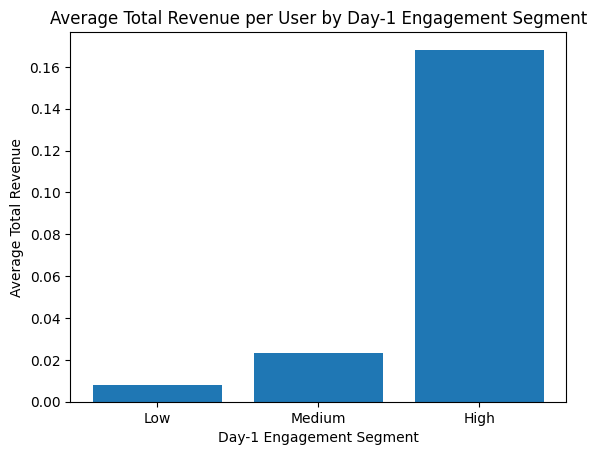

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(
    segment_revenue["engagement_segment"],
    segment_revenue["total_revenue"]
)

plt.title("Average Total Revenue per User by Day-1 Engagement Segment")
plt.xlabel("Day-1 Engagement Segment")
plt.ylabel("Average Total Revenue")

plt.savefig("task2_eda/figures/revenue_by_engagement.png", bbox_inches="tight")
plt.show()

### Insight: Day-1 Engagement Strongly Predicts Monetization

Users with high Day-1 engagement generate significantly more revenue over their lifetime
compared to Medium and Low engagement users. On average, High engagement users generate
over 20x more revenue than Low engagement users.

This suggests that early engagement is a critical driver of both retention and monetization,
and improving the first-day experience could have a large long-term revenue impact.

In [161]:
session_trend = (
    df
    .groupby("days_since_install")["total_session_duration"]
    .mean()
    .reset_index()
)

session_trend.head()

,days_since_install,total_session_duration
0,-1,158.278000
1,0,1157.434454
2,1,1522.740147
3,2,1436.305604
4,3,1422.167330


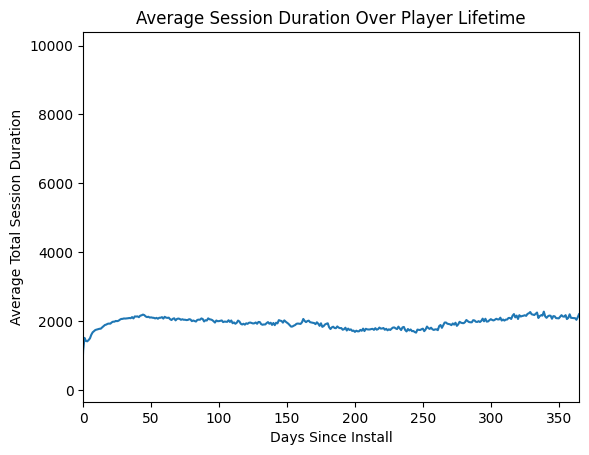

In [ ]:
plt.figure()
plt.plot(
    session_trend["days_since_install"],
    session_trend["total_session_duration"]
)

plt.title("Average Session Duration Over Player Lifetime")
plt.xlabel("Days Since Install")
plt.ylabel("Average Total Session Duration")
plt.xlim(0, 365)
plt.show()

### Insight: Session Duration Remains Stable for Retained Users

Average daily session duration does not show a strong declining trend over time.
Instead, session duration remains relatively stable and even slightly increases
during the first few weeks after install, reaching approximately 2,000 seconds
around Day 20.

Beyond this point, session duration fluctuates but stays at a similar level over
the first year. This suggests that while some players churn early, users who remain
active tend to maintain consistent engagement depth. In other words, engagement
quality does not deteriorate significantly over time for retained users.

This pattern indicates that long-term players are able to find sustained value in
the game, and retention improvements may have a stronger impact on overall engagement
than increasing session length for existing active users.

In [166]:
user_total_revenue = (
    df.groupby("user_id")[["iap_revenue", "ad_revenue"]]
    .sum()
    .sum(axis=1)
    .reset_index(name="total_revenue")
)

user_total_revenue.describe()

,total_revenue
count,2.453499e+06
mean,4.401679e-01
std,1.412362e+01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.827035e-02
max,6.447200e+03


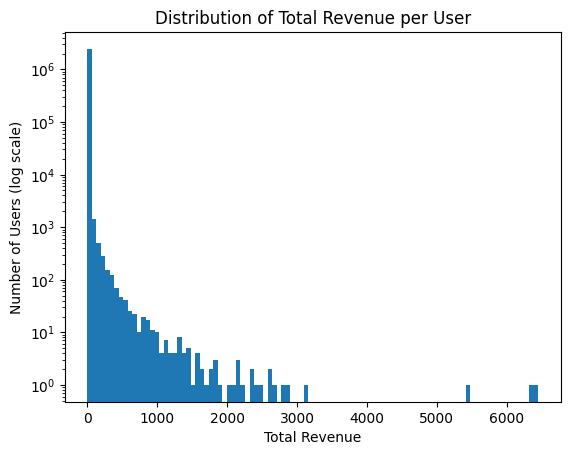

In [167]:
plt.figure()
plt.hist(
    user_total_revenue["total_revenue"],
    bins=100
)

plt.yscale("log")
plt.title("Distribution of Total Revenue per User")
plt.xlabel("Total Revenue")
plt.ylabel("Number of Users (log scale)")
plt.show()

### Insight: Revenue Is Highly Concentrated Among a Small User Segment

The distribution of total revenue per user is heavily right-skewed, indicating that
a small fraction of users generates the majority of revenue. Most users generate little
to no revenue, while a few high-value users contribute disproportionately.

This pattern is consistent with typical free-to-play monetization models and suggests
that retaining and engaging high-value users can have an outsized impact on total revenue.